# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [6]:
data_num = data.apply(pd.to_numeric, errors='coerce') 
data_num.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.049094,0.85835,0.123220,5.6167,7.4042,164.310,2.2214,1.3340,0,4510
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.8020,6.4782,0,3537
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.252660,15.0490,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.085524,0.97282,0.000000,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.5820,114.580,3.1854,2.7420,0,1529


In [7]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

In [8]:
data_num = data_num.drop(['Id'],axis=1) #drop the "ID" column
data_num 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
0,0.025417,0.417690,0.05680,1.16050,-126.3900,0.413550,0.025417,1.23950,1.16500,0.51773,...,0.141650,0.049094,0.85835,0.123220,5.6167,7.4042,164.3100,2.2214,1.3340,0
1,-0.023834,0.210100,0.50839,4.23740,22.0340,0.058412,-0.027621,3.65790,0.98183,0.76855,...,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.4460,13.8020,6.4782,0
2,0.030515,0.446060,0.19569,1.56500,35.7660,0.281960,0.039264,0.88456,1.05260,0.39457,...,0.049940,0.077337,0.95006,0.252660,15.0490,2.8179,104.7300,3.4852,2.6361,0
3,0.052318,0.056366,0.54562,10.68000,438.2000,0.136490,0.058164,10.85300,1.02790,0.61173,...,0.027178,0.085524,0.97282,0.000000,6.0157,7.4626,48.7560,7.4863,1.0602,0
4,0.000992,0.497120,0.12316,1.30360,-71.3980,0.000000,0.001007,1.01160,1.29210,0.50288,...,-0.020100,0.001974,0.99925,0.019736,3.4819,8.5820,114.5800,3.1854,2.7420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.85790,0.98420,0.79415,...,0.269400,0.266940,0.73275,0.022101,NaN,3.5081,66.1710,5.5160,1.4476,0
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.04220,1.05160,0.90042,...,0.285610,0.346400,0.70705,0.044114,14.0180,7.0618,20.7760,17.5680,2.9149,0
4815,-0.029746,0.448980,0.39136,1.93880,7.8073,-0.020006,-0.030561,1.22590,1.00010,0.55040,...,0.000144,-0.054046,0.99986,0.058336,15.5470,8.7022,34.3700,10.6200,23.0860,0
4816,0.284730,0.079573,0.46261,6.81370,-81.1580,-0.795510,0.284730,11.56700,6.07180,0.92043,...,0.816530,0.309350,0.19889,0.000000,NaN,28.5000,4.7834,76.3050,13.2630,0


In [9]:
pd.set_option('display.max_columns', None) 
data_num.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
count,4816.000000,4816.000000,4816.000000,4803.000000,4.808000e+03,4816.000000,4816.000000,4804.000000,4818.000000,4816.000000,4816.000000,4803.000000,4818.000000,4816.000000,4.812000e+03,4804.000000,4804.000000,4816.000000,4818.000000,4818.000000,4744.000000,4816.000000,4818.000000,4702.000000,4816.000000,4804.000000,4513.000000,4735.000000,4816.000000,4818.000000,4818.000000,4.776000e+03,4803.000000,4804.000000,4816.000000,4816.000000,2750.000000,4816.000000,4818.000000,4803.000000,4756.000000,4818.000000,4818.000000,4818.000000,4598.000000,4803.000000,4787.000000,4816.000000,4818.000000,4804.000000,4816.000000,4786.000000,4735.000000,4735.000000,4.818000e+03,4818.000000,4816.000000,4818.000000,4816.000000,4.598000e+03,4806.000000,4818.000000,4803.000000,4735.000000,4818.000000
mean,-0.055232,0.533272,0.188992,4.978602,1.956441e+01,-0.070060,-0.042516,5.739985,1.579277,0.503606,-0.024637,1.218357,0.452284,-0.042485,2.768033e+03,1.261838,6.840618,-0.031071,-0.082028,57.002168,2.740360,-0.015683,-0.090357,0.137708,0.371927,1.162132,381.584380,6.822847,4.161201,0.691991,-0.068612,2.074823e+03,8.520843,5.074955,-0.017852,2.075176,100.185857,0.589316,0.019158,2.225580,2.556513,-0.014902,155.612840,98.610765,81.795906,4.103433,153.579739,-0.103035,-0.072253,4.192413,0.426457,0.817538,8.089876,9.142221,1.074023e+04,0.056109,0.022793,0.959585,0.273025,1.108795e+03,11.021303,177.494445,9.287631,38.557533,0.063927
std,6.707351,1.202909,1.282430,100.273952,2.384491e+04,7.778523,6.707970,109.508001,1.342723,4.044036,6.707526,38.847126,34.196231,6.707970,3.564010e+04,41.012239,109.514664,6.754910,5.754879,182.018911,111.247654,6.230280,5.725258,8.139187,4.110610,38.869521,10190.641455,109.222634,0.830094,11.217691,5.748967,8.766498e+04,112.510758,110.133499,6.228810,14.104903,1191.062846,4.036830,0.756891,63.230203,91.770013,2.617310,795.989622,725.594072,5398.332790,100.171767,3629.693018,7.831554,2.638443,99.744004,1.181019,14.236785,146.093000,161.760705,8.284685e+04,0.755462,7.249022,0.932427,6.338601,7.106563e+04,43.821146,2279.713700,113.225922,588.711967,0.244648
min,-463.890000,0.000000,-72.067000,0.000000,-1.076400e+06,-463.890000,-463.890000,-3.735100,0.000191,-71.444000,-463.890000,-96.239000,-310.340000,-463.890000,-4.667700e+05,-52.440000,0.000000,-463.890000,-310.800000,-29.340000,-135.150000,-431.590000,-310.890000,-463.890000,-71.444000,-52.454000,-158130.000000,-1089.700000,0.006359,-23.060000,-310.800000,0.000000e+00,0.000000,-16.015000,-431.590000,0.000191,-4.325800,-71.444000,-47.047000,-0.335160,-269.990000,-143.520000,-3975.600000,-3946.200000,-3037.300000,-0.108060,-18.658000,-542.560000,-144.800000,0.000000,0.000000,0.000000,-1088.700000,-1088.700000,-1.118500e+06,-46.788000,-468.670000,-0.085920,-184.980000,-1.244000e+01,-0.092493,0.000000,0.000000,-3.726500,0.000000
25%,0.004047,0.254670,0.044923,1.099200,-4.312000e+01,0.000000,0.005985,0.481588,1.015600,0.318990,0.016196,0.017748,0.024954,0.005985,2.485875e+02,0.076220,1.506400,0.005985,0.004368,18.537750,0.989780,0.000718,0.002728,0.022952,0.180270,0.070089,0.098644,0.083393,3.656125,0.085560,0.007006,4.992400e+01,2.777500,0.247707,0.008306,1.062775,1.289100,0.433325,0.005536,0.052631,0.031149,0.000687,76.214500,39.050250,0.019103,0.644920,19.640000,-0.030321,-0.022447,0.831900,0.186070,0.136760,0.756825,0.994015,9.771450e+01,0.011478,0.015574,0.876940,0.000000,5.298300e+00,4.229925,45.065750,3.074350,2.114850,0.000000
50%,0.046487,0.451495,0.218560,1.642300,3.673450e-01,0.000000,0.056685,1.149000,1.140500,0.522325,0.071144,0.167110,0.067723,0.056723,8.966950e+02,0.234650,2.210250,0.056723,0.035307,38.623000,1.119200,0.062112,0.030074,0.162375,0.426515,0.209810,0.991980,0.521880,4.175550,0.225955,0.042826,8.

In [10]:
# Fill the missing numbers with mean of each variable
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_num = pd.DataFrame(imp_mean.fit_transform(data_num), columns=data_num.columns)
data_num

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
0,0.025417,0.417690,0.05680,1.16050,-126.3900,0.413550,0.025417,1.23950,1.16500,0.51773,0.025417,0.071822,0.042589,0.025417,4553.6000,0.080156,2.3941,0.025417,0.032332,64.985,1.09350,0.113860,0.032332,0.413550,0.517730,0.080156,1.687400,0.096384,4.8078,0.513970,0.032332,191.430,1.9067,0.272590,0.113860,0.79532,4.243700,0.58152,0.144830,0.464990,0.112630,0.144830,114.280,49.297,0.181600,0.76501,75.710,0.105790,0.134580,0.98325,0.353890,0.524470,0.87853,0.98679,3649.00,0.141650,0.049094,0.85835,0.123220,5.616700,7.4042,164.3100,2.2214,1.3340,0.0
1,-0.023834,0.210100,0.50839,4.23740,22.0340,0.058412,-0.027621,3.65790,0.98183,0.76855,-0.027621,-0.175880,0.011274,-0.027621,3138.4000,0.116300,4.7595,-0.027621,-0.012744,62.936,1.15070,-0.015089,-0.010996,0.077482,0.768550,0.134330,-0.068354,1.519500,4.8829,0.092599,-0.012744,25.965,14.0570,-0.071818,-0.015089,2.19900,5.497200,0.82161,-0.006962,0.077370,0.186860,-0.006962,110.010,47.079,-0.063774,1.85760,61.792,-0.067146,-0.030980,3.16710,0.157040,0.071138,2.29710,2.45570,38823.00,-0.018502,-0.031011,1.01850,0.069047,5.799600,7.7529,26.4460,13.8020,6.4782,0.0
2,0.030515,0.446060,0.19569,1.56500,35.7660,0.281960,0.039264,0.88456,1.05260,0.39457,0.039264,0.113360,0.056198,0.039264,2400.0000,0.152090,2.2418,0.039264,0.032526,24.253,0.82243,0.038380,0.025278,0.353230,0.394570,0.132470,0.334650,0.427330,4.5257,0.345420,0.032526,110.230,3.3111,0.086042,0.038380,1.23330,4.632700,0.49426,0.031794,0.096624,0.219030,0.031794,153.780,129.530,0.380420,1.33340,25.528,0.009805,0.008122,1.21520,0.346370,0.302010,0.86161,1.07930,6565.20,0.049940,0.077337,0.95006,0.252660,15.049000,2.8179,104.7300,3.4852,2.6361,0.0
3,0.052318,0.056366,0.54562,10.68000,438.2000,0.136490,0.058164,10.85300,1.02790,0.61173,0.058164,1.031900,0.186870,0.058164,260.9100,1.399000,17.7410,0.058164,0.137840,60.675,0.94921,0.059565,0.123980,0.149690,0.611730,1.295300,1.451000,1.370900,4.7352,-0.990460,0.137840,50.118,7.2828,1.056700,0.059565,0.54580,100.185857,0.61173,0.141160,8.432300,0.023090,0.141160,109.590,48.911,0.745850,9.43550,62.370,0.038873,0.092122,10.68000,0.056366,0.137310,1.53700,1.53700,29652.00,0.027178,0.085524,0.97282,0.000000,6.015700,7.4626,48.7560,7.4863,1.0602,0.0
4,0.000992,0.497120,0.12316,1.30360,-71.3980,0.000000,0.001007,1.01160,1.29210,0.50288,0.017035,0.002484,0.040636,0.001007,3455.9000,0.105620,2.0116,0.001007,0.000780,104.830,0.97245,0.017035,0.000768,0.002107,0.101330,0.105590,1.062900,0.261370,4.0033,0.381750,0.012043,112.330,3.2495,2.651300,-0.025970,1.29210,15.890000,0.51280,-0.020100,0.017617,0.241800,0.013184,147.360,42.531,0.002675,0.38879,102.760,-0.034462,-0.026672,1.06370,0.405620,0.307740,1.06720,1.08820,1241.00,-0.020100,0.001974,0.99925,0.019736,3.481900,8.5820,114.5800,3.1854,2.7420,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.211990,0.205850,0.14170,1.79410,72.9810,0.000000,0.265310,3.85790,0.98420,0.79415,0.272790,1.486900,0.289990,0.265310,263.2500,1.386500,4.8579,0.265310,0.269570,0.000,1.14710,0.267480,0.215400,0.646780,0.790310,1.127500,35.734000,0.208410,4.1152,0.168950,0.277170,90.571,4.0300,3.493100,0.265140,0.98420,18.239000,0.81170,0.269400,0.221780,0.023860,0.271770,104.050,104.050,81.795906,1.79410,0.000,0.247380,0.251350,1.55510,0.178430,0.248140,1.16810,1.19390,1847.30,0.269400,0.266940,0.73275,0.022101,1108.794967,3.5081,66.1710,5.5160,1.4476,0.0
4814,0.311900,0.099580,0.57936,10.67900,245.9800,0.000000,0.313170,9.04220,1.05160,0.90042,0.315610,5.231800,0.312600,0.313170,110.5600,3.301200,1

In [11]:
y = data_num['Bankrupt'] # create a new test data set from the training data set
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Bankrupt, dtype: float64

In [12]:
X = data_num.drop(['Bankrupt'],axis=1) 
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.025417,0.417690,0.05680,1.1605,-126.390,0.413550,0.025417,1.23950,1.16500,0.51773,0.025417,0.071822,0.042589,0.025417,4553.60,0.080156,2.3941,0.025417,0.032332,64.985,1.09350,0.113860,0.032332,0.413550,0.51773,0.080156,1.687400,0.096384,4.8078,0.513970,0.032332,191.430,1.9067,0.272590,0.113860,0.79532,4.243700,0.58152,0.144830,0.464990,0.11263,0.144830,114.28,49.297,0.181600,0.76501,75.710,0.105790,0.134580,0.98325,0.353890,0.524470,0.87853,0.98679,3649.0,0.141650,0.049094,0.85835,0.123220,5.6167,7.4042,164.310,2.2214,1.3340
1,-0.023834,0.210100,0.50839,4.2374,22.034,0.058412,-0.027621,3.65790,0.98183,0.76855,-0.027621,-0.175880,0.011274,-0.027621,3138.40,0.116300,4.7595,-0.027621,-0.012744,62.936,1.15070,-0.015089,-0.010996,0.077482,0.76855,0.134330,-0.068354,1.519500,4.8829,0.092599,-0.012744,25.965,14.0570,-0.071818,-0.015089,2.19900,5.497200,0.82161,-0.006962,0.077370,0.18686,-0.006962,110.01,47.079,-0.063774,1.85760,61.792,-0.067146,-0.030980,3.16710,0.157040,0.071138,2.29710,2.45570,38823.0,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.8020,6.4782
2,0.030515,0.446060,0.19569,1.5650,35.766,0.281960,0.039264,0.88456,1.05260,0.39457,0.039264,0.113360,0.056198,0.039264,2400.00,0.152090,2.2418,0.039264,0.032526,24.253,0.82243,0.038380,0.025278,0.353230,0.39457,0.132470,0.334650,0.427330,4.5257,0.345420,0.032526,110.230,3.3111,0.086042,0.038380,1.23330,4.632700,0.49426,0.031794,0.096624,0.21903,0.031794,153.78,129.530,0.380420,1.33340,25.528,0.009805,0.008122,1.21520,0.346370,0.302010,0.86161,1.07930,6565.2,0.049940,0.077337,0.95006,0.252660,15.0490,2.8179,104.730,3.4852,2.6361
3,0.052318,0.056366,0.54562,10.6800,438.200,0.136490,0.058164,10.85300,1.02790,0.61173,0.058164,1.031900,0.186870,0.058164,260.91,1.399000,17.7410,0.058164,0.137840,60.675,0.94921,0.059565,0.123980,0.149690,0.61173,1.295300,1.451000,1.370900,4.7352,-0.990460,0.137840,50.118,7.2828,1.056700,0.059565,0.54580,100.185857,0.61173,0.141160,8.432300,0.02309,0.141160,109.59,48.911,0.745850,9.43550,62.370,0.038873,0.092122,10.68000,0.056366,0.137310,1.53700,1.53700,29652.0,0.027178,0.085524,0.97282,0.000000,6.0157,7.4626,48.756,7.4863,1.0602
4,0.000992,0.497120,0.12316,1.3036,-71.398,0.000000,0.001007,1.01160,1.29210,0.50288,0.017035,0.002484,0.040636,0.001007,3455.90,0.105620,2.0116,0.001007,0.000780,104.830,0.97245,0.017035,0.000768,0.002107,0.10133,0.105590,1.062900,0.261370,4.0033,0.381750,0.012043,112.330,3.2495,2.651300,-0.025970,1.29210,15.890000,0.51280,-0.020100,0.017617,0.24180,0.013184,147.36,42.531,0.002675,0.38879,102.760,-0.034462,-0.026672,1.06370,0.405620,0.307740,1.06720,1.08820,1241.0,-0.020100,0.001974,0.99925,0.019736,3.4819,8.5820,114.580,3.1854,2.7420


In [13]:
# split the training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4336, 64)
X_test shape:  (482, 64)
y_train shape:  (4336,)
y_test shape:  (482,)


In [14]:
print(y_train.value_counts())

0.0    4061
1.0     275
Name: Bankrupt, dtype: int64


<AxesSubplot:ylabel='Bankrupt'>

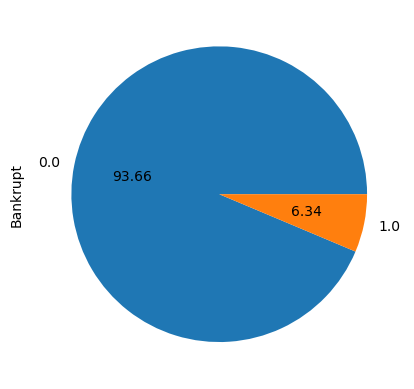

In [15]:
y_train.value_counts().plot.pie(autopct='%.2f')

Among all the observations in the training data set, we find that 93.66% of the companies will not go bankrupt. Since the training data set is imbalance, we will use random oversampling technique method to solve it.

<AxesSubplot:ylabel='Bankrupt'>

0.0    4510
1.0    4510
Name: Bankrupt, dtype: int64


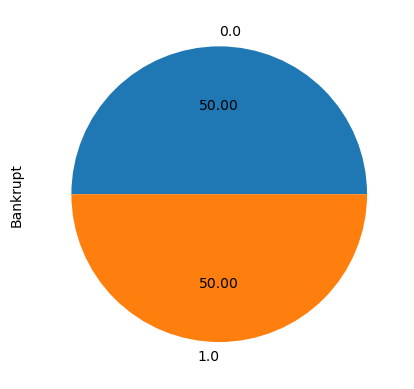

In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X, y)
y_train_res.value_counts().plot.pie(autopct='%.2f') 
print(y_train_res.value_counts())

After resampling, we will start to fit the training data set into classification models. Before that, we need to check multicolinearity of each variables in order to meet the assumptions of some linear classification models.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()
df_vif['Variable names'] = X_train_res.columns
df_vif['VIF_res'] = [variance_inflation_factor(X_train_res.values, i) for i in range(X_train_res.shape[1])] 
df_vif['VIF_nonres'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.set_option('display.max_rows', None) 
df_vif

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable names,VIF_res,VIF_nonres
0,X1,4.731906e+05,3.247862e+02
1,X2,1.308560e+03,6.169674e+02
2,X3,1.307593e+02,3.618703e+01
3,X4,1.775227e+03,1.037984e+04
4,X5,9.648590e+00,1.519288e+00
5,X6,2.676738e+02,6.720783e+00
6,X7,inf,inf
7,X8,2.010397e+04,4.315381e+04
8,X9,6.784966e+00,6.577378e+00
9,X10,2.500047e+04,6.970640e+02


In [18]:
 df_vif.loc[df_vif['VIF_res']<=4,'Variable names'] # keep the variables that have less than 4 VIF values

14    X15
20    X21
26    X27
31    X32
36    X37
40    X41
46    X47
54    X55
56    X57
58    X59
60    X61
Name: Variable names, dtype: object

In [19]:
X_train_res_sub = X_train_res[['X15','X21','X27','X32','X37','X41','X47','X55','X57','X59','X61']]
X_test_sub = X_test[['X15','X21','X27','X32','X37','X41','X47','X55','X57','X59','X61']]
X_test_sub

,X15,X21,X27,X32,X37,X41,X47,X55,X57,X59,X61
4340,14201.000000,1.55860,0.167930,141.470000,55.044000,0.495410,29.888000,1.998500e+04,0.003629,0.037272,4.044200
1221,404.250000,1.43540,27.340000,55.673000,9.807400,0.035838,36.605000,2.443900e+03,0.186370,0.044616,5.109600
2083,171.810000,1.25620,1261.900000,24.623000,100.185857,0.016303,75.299000,1.904100e+04,0.163620,0.000000,6.873200
1044,2981.400000,1.21930,0.610290,62.768000,0.176740,0.149910,58.743000,4.087900e+03,0.132240,1.680600,33.065000
2555,4370.000000,0.84651,1.252500,185.120000,1.266600,0.279270,326.840000,4.408800e+03,0.049097,0.558330,2.582900
3908,2854.100000,0.98858,2.055000,172.300000,9.363600,0.171220,45.266000,-1.049800e+04,-0.292490,-0.078621,12.437000
1978,400.130000,1.11680,1.346800,87.061000,217.240000,0.036055,45.404000,2.102300e+04,0.184870,0.002005,5.826300
315,3714.200000,1.24640,0.996160,137.060000,5.824200,0.184170,62.135000,-5.064600e+03,-0.263880,0.544430,6.918100
8,181.560000,3.63920,0.747690,16.067000,100.185857,0.017362,0.000000,5.337800e+02,0.014237,0.000000,4.686000
2473,531.130000,1.12350,12457.000000,45.136000,100.185857,0.049216,1.621600,5.658000e+02,0.036918,0.000000,10.588000


Model 1: Logistic Regression

First, standardize the training set. Use the X_train_res_sub_scaled dataset to train the logistic model in order to meet the assumptions of the linear model.

In [20]:
# standardization
from sklearn.preprocessing import StandardScaler
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns)
X_train_res_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train_res), columns=X_train_res.columns)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
X_train_res_sub_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train_res_sub), columns=X_train_res_sub.columns)
X_test_sub_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test_sub), columns=X_test_sub.columns)
X_test_sub_scaled.shape

(482, 11)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 

param_log = [
    {'penalty': ['l2', 'l1', 'elasticnet', 'none'],
     'C': np.logspace(-5, 5, 10),
     'solver': ['liblinear', 'lbfgs', 'newton-cg']}
]

rs_log = RandomizedSearchCV(LogisticRegression(), param_distributions=param_log)
rs_log.fit(X_train_res_sub_scaled, y_train_res)
%time rs_log.fit(X_train_res_sub_scaled, y_train_res)
print(rs_log.best_params_)

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/s

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                                         'penalty': ['l2', 'l1', 'elasticnet',
                                                     'none'],
                                         'solver': ['liblinear', 'lbfgs',
                                                    'newton-cg']}])

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tina/opt/anaconda3/lib/python3.9/site-packages/s

CPU times: user 8.12 s, sys: 1.63 s, total: 9.75 s
Wall time: 1.26 s


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                                         'penalty': ['l2', 'l1', 'elasticnet',
                                                     'none'],
                                         'solver': ['liblinear', 'lbfgs',
                                                    'newton-cg']}])

{'solver': 'lbfgs', 'penalty': 'none', 'C': 1e-05}


In [22]:
# in-sample score
from sklearn.metrics import accuracy_score, recall_score, precision_score 
y_train_hat = rs_log.predict(X_train_res_sub_scaled)
score_in_sample = accuracy_score(y_train_res,y_train_hat)
score_in_sample

0.6863636363636364

In [23]:
# out-sample score
y_test_hat = rs_log.predict(X_test_sub_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.6473029045643154

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


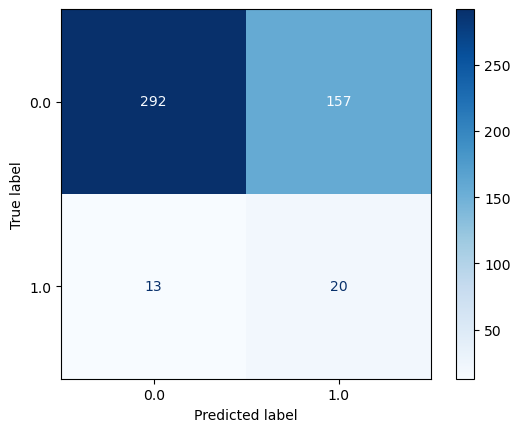

In [24]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(rs_log, X_test_sub_scaled, y_test, cmap='Blues')
plt.show()

In [25]:
name = 'Logistic Regression'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary")
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Logistic Regression Accuracy: 64.7%, Recall 60.6%, Precision 11.3%


Model 2: Naive Bayes Classification

In [26]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
param_GNB = [
    { 'var_smoothing':np.logspace(-9,2,10)} 
]
clf_GNB = GridSearchCV(clf,param_grid=param_GNB)
best_clf_GNB = clf_GNB.fit(X_train_res_scaled,y_train_res) 
%time best_clf_GNB.fit(X_train_res_scaled,y_train_res) 
print(best_clf_GNB.best_params_)

CPU times: user 199 ms, sys: 20.7 ms, total: 220 ms
Wall time: 220 ms


GridSearchCV(estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.00000000e-09, 1.66810054e-08, 2.78255940e-07, 4.64158883e-06,
       7.74263683e-05, 1.29154967e-03, 2.15443469e-02, 3.59381366e-01,
       5.99484250e+00, 1.00000000e+02])}])

{'var_smoothing': 0.0012915496650148853}


In [27]:
# in-sample score
y_train_hat = best_clf_GNB.predict(X_train_res_scaled) 
score_in_sample = accuracy_score(y_train_res,y_train_hat) 
score_in_sample

0.5971175166297118

In [28]:
# out-sample score
y_test_hat = best_clf_GNB.predict(X_test_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.9045643153526971

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


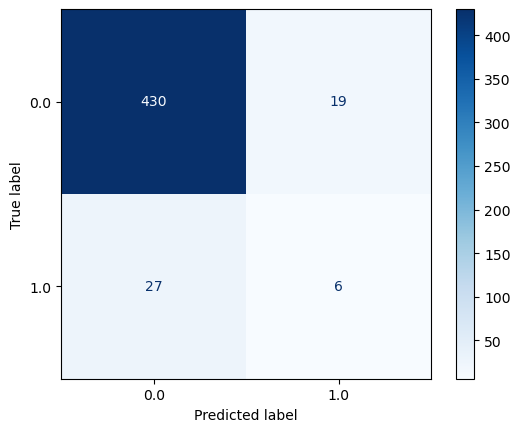

In [29]:
# confusion matrix
disp = plot_confusion_matrix(best_clf_GNB, X_test_scaled, y_test, cmap='Blues')

In [30]:
name = 'Naive Bayes Classification'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary") 
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Naive Bayes Classification Accuracy: 90.5%, Recall 18.2%, Precision 24.0%


Model 3: Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(random_state=42) 
param_DT = [
    {
        'criterion':['gini'],
        'max_depth':[10,30,50,70,100],
        'min_samples_leaf':[2,3,5,10]
} ]
clf_DT = GridSearchCV(clf,param_grid=param_DT) 
best_clf_DT = clf_DT.fit(X_train_res_scaled,y_train_res) 
%time best_clf_DT.fit(X_train_res_scaled,y_train_res) 
print(best_clf_DT.best_params_)

CPU times: user 18.2 s, sys: 92.8 ms, total: 18.3 s
Wall time: 18.3 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [10, 30, 50, 70, 100],
                          'min_samples_leaf': [2, 3, 5, 10]}])

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2}


In [32]:
# in-sample score
y_train_hat = best_clf_DT.predict(X_train_res_scaled) 
score_in_sample = accuracy_score(y_train_res,y_train_hat) 
score_in_sample

0.9973392461197339

In [33]:
# out-sample score
y_test_hat = best_clf_DT.predict(X_test_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.7385892116182573

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2}

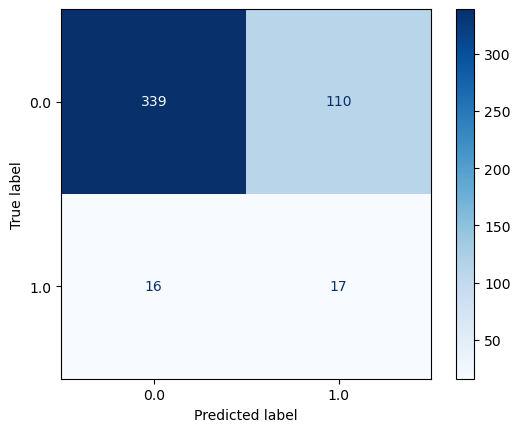

In [34]:
# confusion matrix
disp = plot_confusion_matrix(best_clf_DT, X_test_scaled, y_test, cmap='Blues')
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2}

In [35]:
name = 'Decision Tree Classification'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary")
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
         

	Decision Tree Classification Accuracy: 73.9%, Recall 51.5%, Precision 13.4%


Model 4: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
param_RF = [
    {
        'criterion':['gini'],
        'max_depth':[10,30,50,70,100],
        'min_samples_leaf':[2,3,5,10]
} ]
clf_RF = GridSearchCV(clf,param_grid=param_RF) 
best_clf_RF = clf_RF.fit(X_train_res_scaled,y_train_res) 
%time best_clf_RF.fit(X_train_res_scaled,y_train_res) 
print(best_clf_RF.best_params_)

CPU times: user 2min 38s, sys: 974 ms, total: 2min 39s
Wall time: 2min 39s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [10, 30, 50, 70, 100],
                          'min_samples_leaf': [2, 3, 5, 10]}])

{'criterion': 'gini', 'max_depth': 70, 'min_samples_leaf': 2}


In [37]:
# in-sample score
y_train_hat = best_clf_RF.predict(X_train_res_scaled) 
score_in_sample = accuracy_score(y_train_res,y_train_hat) 
score_in_sample

0.9997782705099778

In [38]:
# out-sample score
y_test_hat = best_clf_RF.predict(X_test_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.9253112033195021

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


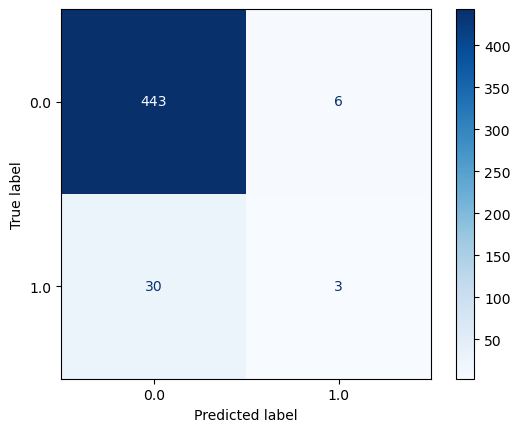

In [39]:
# confusion matrix
disp = plot_confusion_matrix(best_clf_RF, X_test_scaled, y_test, cmap='Blues')

In [40]:
name = 'Random Forest Classification'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary") 
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Random Forest Classification Accuracy: 92.5%, Recall 9.1%, Precision 33.3%


Model 5: Support Vector Classification

In [41]:
from sklearn.svm import SVC
clf_SVC= SVC(kernel='rbf',gamma='auto', C=100) 
best_clf_SVC = clf_SVC.fit(X_train_res_scaled,y_train_res)

In [42]:
# in-sample score
y_train_hat = best_clf_SVC.predict(X_train_res_scaled) 
score_in_sample = accuracy_score(y_train_res,y_train_hat) 
score_in_sample

0.8504434589800444

In [43]:
# out-sample score
y_test_hat = best_clf_SVC.predict(X_test_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.43983402489626555

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


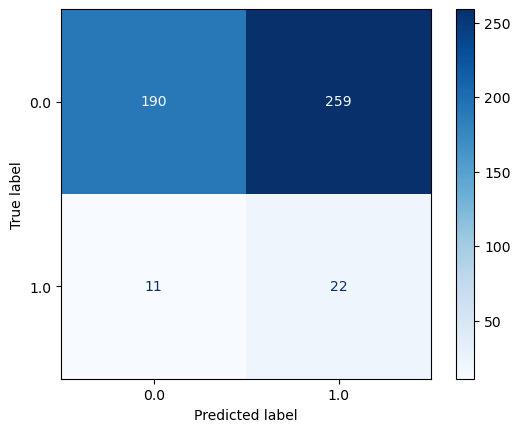

In [44]:
# confusion matrix
disp = plot_confusion_matrix(best_clf_SVC, X_test_scaled, y_test, cmap='Blues')

In [45]:
name = 'Support Vector Classification'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary") 
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Support Vector Classification Accuracy: 44.0%, Recall 66.7%, Precision 7.8%


Model 6: XGBoost Classifier

In [46]:
# use the X_train_res_sub_scaled dataset
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(learning_rate=0.25, max_depth=5,
n_estimators=5000, subsample=0.4, colsample_bytree=0.5, eval_metric='auc', verbosity=1)
clf_xgb.fit(X_train_res_sub_scaled,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [47]:
# in-sample score
y_train_hat = clf_xgb.predict(X_train_res_sub_scaled) 
score_in_sample = accuracy_score(y_train_res,y_train_hat) 
score_in_sample

0.9998891352549889

In [48]:
# out-sample score
y_test_hat = clf_xgb.predict(X_test_sub_scaled) 
score_out_of_sample = accuracy_score(y_test,y_test_hat) 
score_out_of_sample

0.41286307053941906

/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


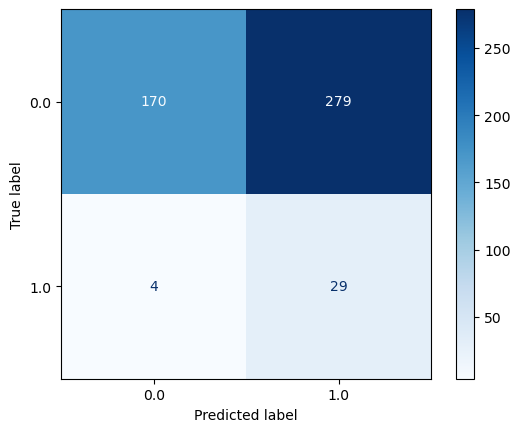

In [49]:
# confusion matrix
disp = plot_confusion_matrix(clf_xgb, X_test_sub_scaled, y_test, cmap='Blues')

In [50]:
name = 'xgb'
accuracy_test = accuracy_score(y_test, y_test_hat)
recall_test = recall_score(y_test, y_test_hat, pos_label=1, average="binary") 
precision_test = precision_score(y_test, y_test_hat, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	xgb Accuracy: 41.3%, Recall 87.9%, Precision 9.4%


Conclusion: In general, Decision Tree model is the best fitted in this project, with less false negative cases and relatively higher accuracy.

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [51]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [52]:

import pandas as pd
import os

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    X = pd.DataFrame(imp_mean.fit_transform(X), columns=X_test.columns, index=X.index)
    X = StandardScaler().fit_transform(X)
    predictions = clf_DT.predict(X)
    
    return predictions



# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [53]:
name = "My Best-Fitted Model:"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	My Best-Fitted Model: Accuracy: 73.9%, Recall 51.5%, Precision 13.4%


/Users/tina/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
